## Load and Combine Images in Notebook

In [1]:
import os
import shutil
import pandas as pd

# Create folders to organize dataset
os.makedirs('dataset/AI', exist_ok=True)
os.makedirs('dataset/Human', exist_ok=True)

# Helper function to copy first N image files from nested directories
def copy_images_from_nested(src_dir, dst_dir, limit=200):
    count = 0
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
                shutil.copy(os.path.join(root, file), os.path.join(dst_dir, file))
                count += 1
                if count >= limit:
                    return

# Copy AI images
ai_image_folder = '/kaggle/input/ai-generated-images'
copy_images_from_nested(ai_image_folder, 'dataset/AI', limit=200)

# Copy Human art images
human_image_folder = '/kaggle/input/wikiart'
copy_images_from_nested(human_image_folder, 'dataset/Human', limit=200)

## Create a CSV File for Labels

In [2]:
# Generate CSV with file paths and labels
data = []

for category in ['AI', 'Human']:
    for img in os.listdir(f'dataset/{category}'):
        data.append({'filename': f'{category}/{img}', 'label': category})

df = pd.DataFrame(data)
df.to_csv('ai_vs_human_art_labels.csv', index=False)
df.head()

,filename,label
0,AI/22.jpeg,AI
1,AI/8.jpeg,AI
2,AI/57.jpeg,AI
3,AI/70.jpeg,AI
4,AI/50.jpeg,AI


## Visualize Some Samples

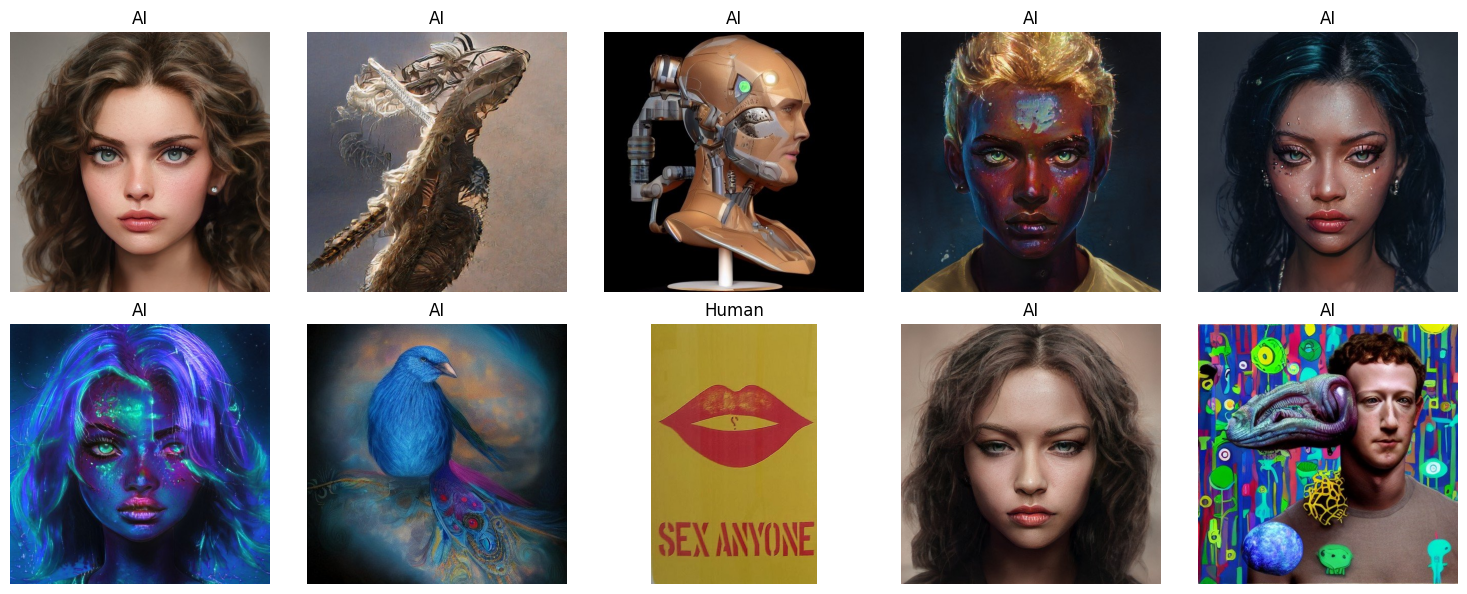

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

sample = df.sample(10).reset_index(drop=True)  # Reset index to avoid IndexError

for i, row in sample.iterrows():
    img_path = f'dataset/{row["filename"]}'
    img = mpimg.imread(img_path)

    row_idx = i // 5
    col_idx = i % 5

    axes[row_idx, col_idx].imshow(img)
    axes[row_idx, col_idx].set_title(row['label'])
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

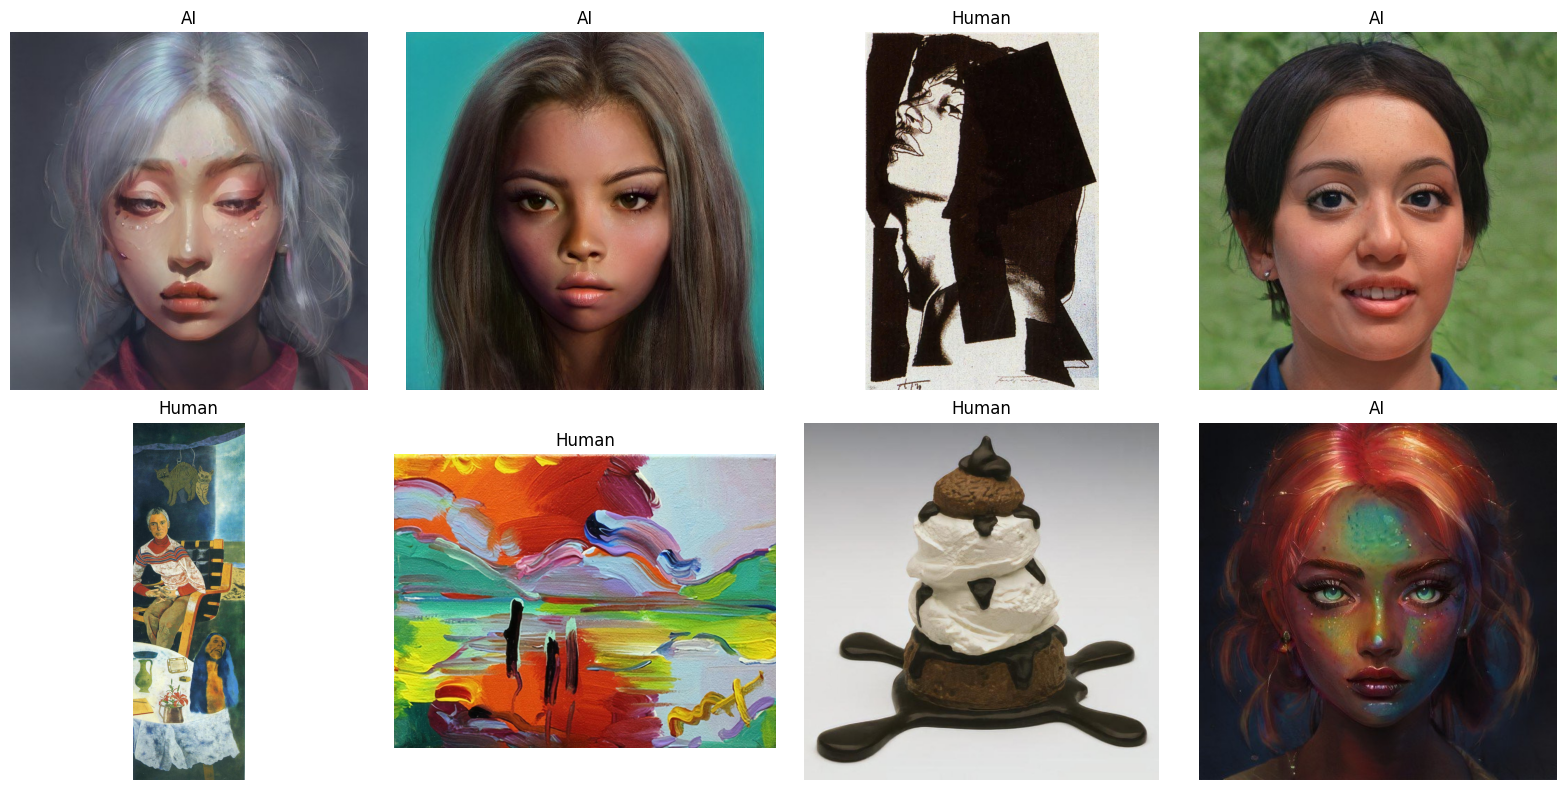

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# Sample 8 images
sample = df.sample(8).reset_index(drop=True)
n_images = len(sample)
n_cols = 4
n_rows = math.ceil(n_images / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

axes = axes.flatten()  # Flatten in case it's 2D

for i, row in sample.iterrows():
    img = mpimg.imread(f'dataset/{row["filename"]}')
    axes[i].imshow(img)
    axes[i].set_title(row['label'])
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Save Dataset as Output

In [5]:
# Save folder as Kaggle dataset
shutil.make_archive('ai_vs_human_art_dataset', 'zip', 'dataset')

'/kaggle/working/ai_vs_human_art_dataset.zip'